In [3]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

from sklearn.pipeline import Pipeline

%matplotlib inline

sns.set_style("darkgrid")

/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [4]:
df = pd.read_csv('../Data/Craigs_1_30')
df.shape

(6495, 14)

In [5]:
df_cleaning = df[df["Body"].notnull()]
df_cleaning = df_cleaning[df_cleaning["Who_to"].notnull()]

In [6]:
df_cleaning.Body.isnull().count()

6151

In [7]:
df_cleaning.head()

,Ids,Title,City,Geo_Tag,Where,Who_to,Age,Height,Body_type,Body,Datetime,Has_Image,Has_Maps,URL
0,5.915963e+09,Turning love to hate,austin,"(30.3423, -97.6673)","In the wind, along with my love",m4w,NaN,NaN,NaN,Imagine the effort it takes to cultivate love ...,2016-12-12 08:23,False,True,http://austin.craigslist.org/mis/5915962984.html
1,5.931213e+09,The Golden Fleece,austin,"(30.3764, -97.7078)",ATX,m4w,NaN,NaN,NaN,Sometimes little swings of the air lead to big...,2016-12-23 17:47,False,True,http://austin.craigslist.org/mis/5931212722.html
2,5.931333e+09,24-hr Braker,austin,NaN,24-hr Braker,m4m,NaN,NaN,NaN,I was getting out of the shower somewhere betw...,2016-12-23 20:01,False,True,http://austin.craigslist.org/mis/5931333454.html
3,5.931378e+09,amys ice cream,austin,"(30.445205, -97.782797)",North austin,m4w,NaN,NaN,NaN,Blonde server at Amy's ice cream. I couldn't s...,2016-12-23 21:14,False,True,http://austin.craigslist.org/mis/5931377983.html
4,5.924584e+09,fallen_angel,austin,"(30.233479, -97.796884)",NaN,m4w,NaN,NaN,NaN,I saw a couple of adds here in missed connecti...,2016-12-23 21:31,True,True,http://austin.craigslist.org/mis/5924584333.html


In [8]:
df_cleaning["From"] = 1
df_cleaning["To"] = 1

In [9]:
df_cleaning["From"] = df_cleaning.Who_to.map(lambda x: x[0])
df_cleaning["To"] = df_cleaning.Who_to.map(lambda x: x[2])

In [10]:
# df.drop(df.index[[1,3]], inplace=True)
df_cleaning = df_cleaning.ix[~(df_cleaning['From'] == 't')]

# df_cleaning = [df_cleaning.drop(index[x]) for x in range(df_cleaning.shape[0]) if df_cleaning.From[x] == 't']

In [11]:
df_cleaning.From.unique()

array(['m', 'w'], dtype=object)

In [12]:
def checking_category(inp):
    if inp == "mm":
        return 'couple'
    elif inp == "ww":
        return 'couple'
    elif inp == "mw": 
        return 'couple'
    elif inp == "wm":
        return 'couple'
    else:
        return inp

df_cleaning["From"] = df_cleaning.From.map(checking_category)
df_cleaning["To"] = df_cleaning.To.map(checking_category)

In [55]:
df_cleaning.shape

(6093, 16)

In [14]:
#df_Cleaning = pd.get_dummies(df_cleaning, columns= ['From'])

In [15]:
#df_Cleaning.From_w.sum()

1038.0

In [56]:
df_Cleaning = df_cleaning
df_Cleaning['From_binary'] = df_Cleaning['From'].map(lambda x: 1 if x == 'm' else 0)

In [57]:
all_body = df_Cleaning.Body

In [17]:
#male = df_Cleaning.Body.ix[~(df_Cleaning['From_m'] == 0.0)]
#female = df_Cleaning.Body.ix[~(df_Cleaning['From_w'] == 0.0)]

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words='english')

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def plot_freq(data, vectorizer="tfidf", stopwords = stop, ngram_range = (1,1)):
    
    if vectorizer == "tfidf":
        vect = TfidfVectorizer(stop_words=stop, sublinear_tf=False, use_idf=True, smooth_idf=True, ngram_range= ngram_range)
    else:
        vect = CountVectorizer(max_df = 0.3, min_df = 0.01,stop_words=stop, ngram_range = ngram_range)
    
    X      =  vect.fit_transform(data)
    x_df   =  pd.DataFrame(X.toarray(), columns=vect.vocabulary_)
    tf_df  =  pd.DataFrame(x_df.mean(), columns=["freq"])
    
    title  =  "Frequency - Top 20: %s, Stopwords: %s" % 
    
    tf_df.sort_values("freq").tail(30).plot(kind="barh", title=title, figsize=(10,5))

SyntaxError: invalid syntax (<ipython-input-1-79609d4e33c7>, line 14)

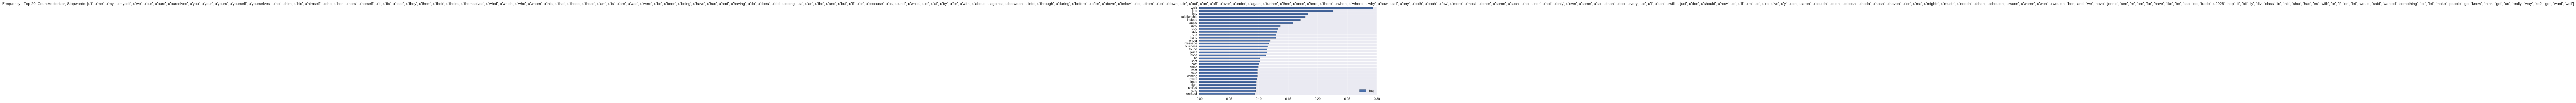

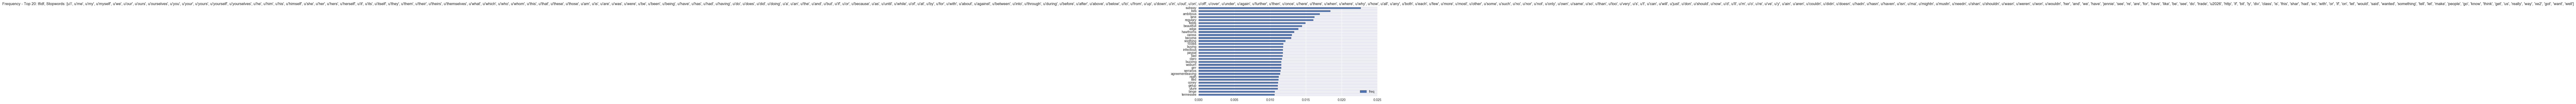

In [53]:
plot_freq(all_body, vectorizer = "CountVectorizer")
plot_freq(all_body, vectorizer = "tfidf")

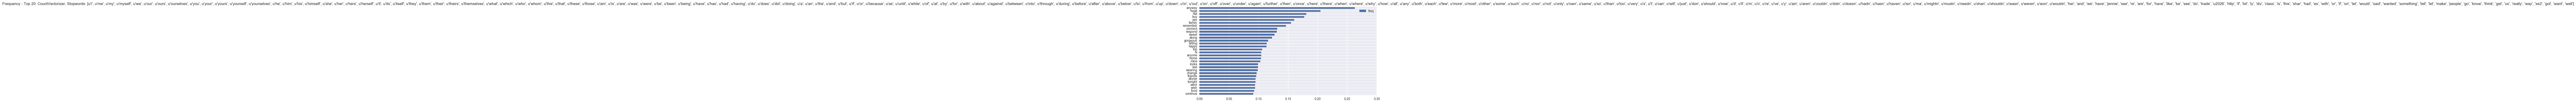

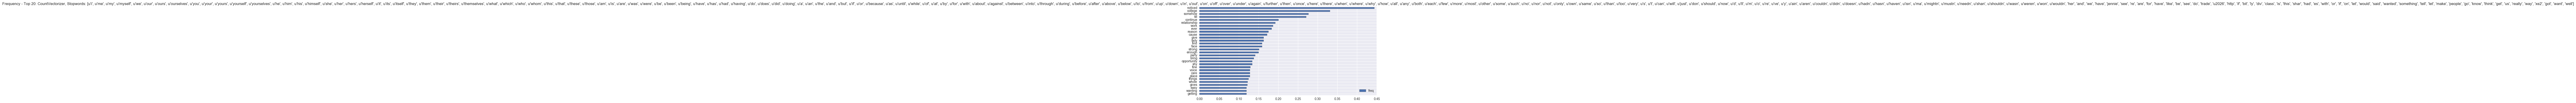

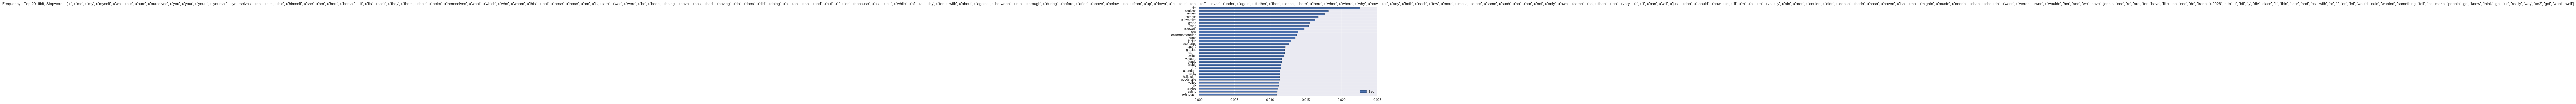

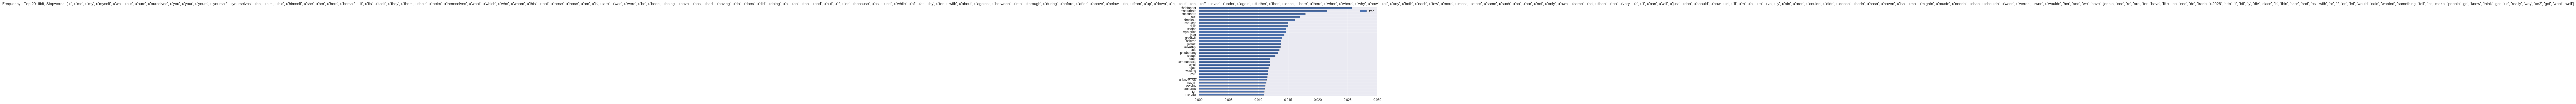

In [54]:
plot_freq(male, vectorizer = "CountVectorizer")
plot_freq(female, vectorizer = "CountVectorizer")
plot_freq(male, vectorizer = "tfidf")
plot_freq(female, vectorizer = "tfidf")

In [22]:
from sklearn.preprocessing import StandardScaler, minmax_scale

def hist_counts(X_all):

    count_df = pd.DataFrame(X_all.toarray())
    hist_counts = pd.DataFrame(minmax_scale(count_df.sum()))
    hist_counts.plot(kind="hist", bins=50, title="Histogram - All")
    hist_counts[hist_counts[0] > .2].plot(kind="hist", bins=50, title="Histogram - Counts > .1") # There are a lot of really common tokens within 10% -- filter them out
    hist_counts[hist_counts[0] < .01].plot(kind="hist", title="Histogram - Counts < .01") # look at the range of extreme commons that seem to exist below .01
    

In [205]:
cvt      =  CountVectorizer(strip_accents='unicode', ngram_range=(2,2), max_features=20000)
X_male    =  cvt.fit_transform(male)
X_female = cvt.fit_transform(female)
x_all = cvt.fit_transform(df_Cleaning.Body)

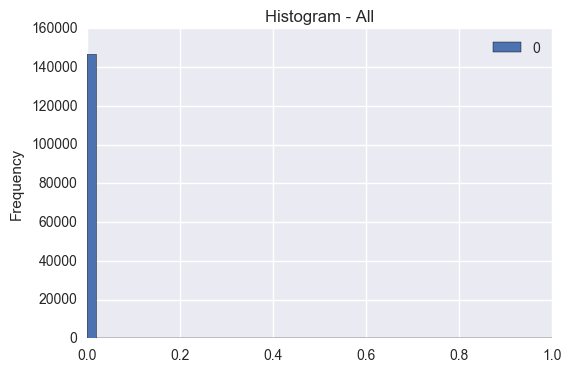

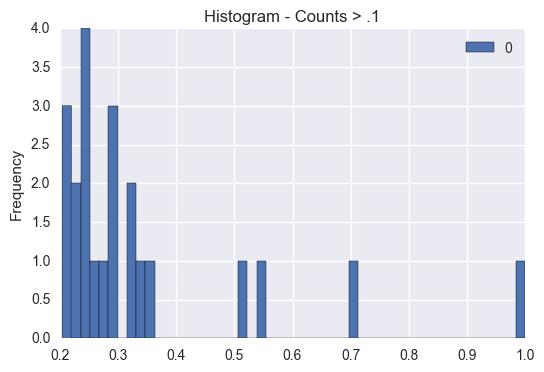

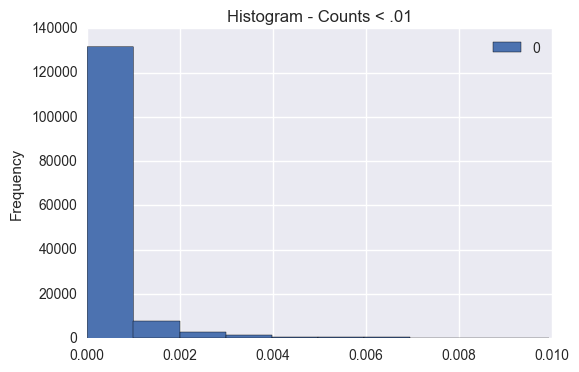

In [640]:
hist_counts(x_all)

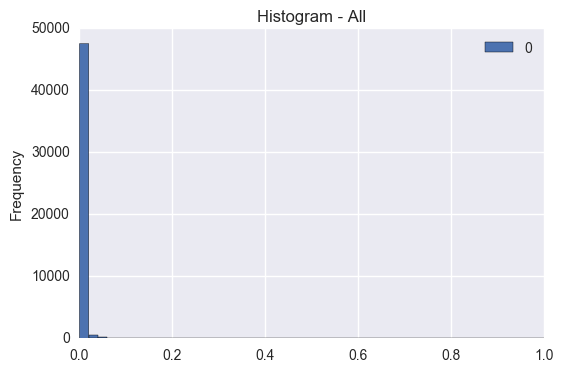

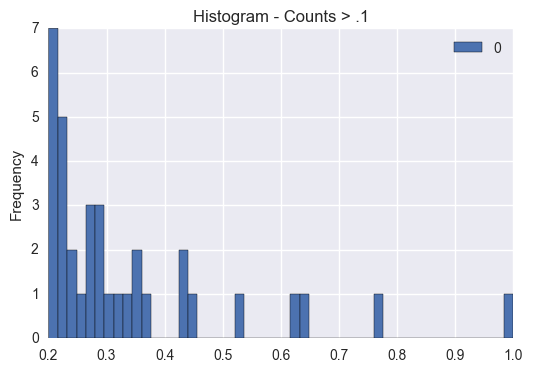

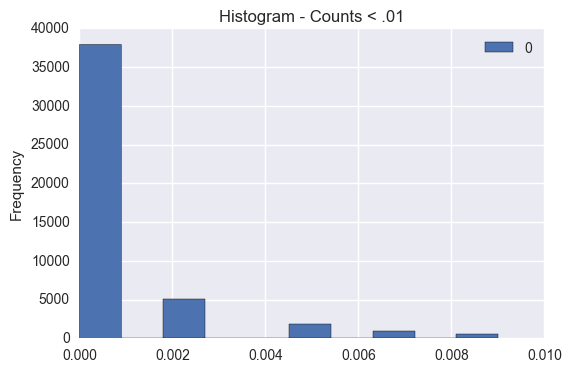

In [629]:
hist_counts(X_female)

## Everything

In [206]:
x_df     =  pd.DataFrame(x_all.todense(), columns=cvt.get_feature_names())
tf_df    =  pd.DataFrame(x_df.sum(), columns=["freq"])

In [58]:
tf_df.freq.quantile(.99999)

1788.2164000012563

In [59]:
tf_df[(tf_df['freq'] >= 10) & (tf_df['freq'] <= 440)].sort_values("freq", ascending=False)

,freq
and we,423
looking for,418
for you,417
but you,395
when you,389
for the,388
the same,388
in my,384
in your,378
of you,373


## For male and female

In [26]:
x_df     =  pd.DataFrame(X_male.toarray(), columns=cvt.get_feature_names())
tf_df    =  pd.DataFrame(x_df.sum(), columns=["freq"])

ValueError: Shape of passed values is (118330, 5055), indices imply (147189, 5055)

In [ ]:
tf_df.freq.quantile(.99999)

In [27]:
tf_df[(tf_df['freq'] >= 10) & (tf_df['freq'] <= 440)].sort_values("freq", ascending=False)

NameError: name 'tf_df' is not defined

In [28]:
x_df     =  pd.DataFrame(X_female.toarray(), columns=cvt.get_feature_names())
tf_df    =  pd.DataFrame(x_df.sum(), columns=["freq"])

ValueError: Shape of passed values is (48517, 1038), indices imply (147189, 1038)

In [29]:
tf_df.freq.quantile(.99999)

NameError: name 'tf_df' is not defined

In [30]:
tf_df[(tf_df['freq'] >= 10) & (tf_df['freq'] <= 440)].sort_values("freq", ascending=False)

NameError: name 'tf_df' is not defined

In [59]:
from nltk.corpus import stopwords
stop = stopwords.words('English')
stop += ['her', 'and', 'we', 'have']
stop.append("jennie")
stop.append("see")
stop.append("re")
stop.append("are")
stop.append("for")
stop.append("have")
stop.append("like")
stop.append("be")
stop.append("see")
stop.append("do")
stop.append("trade")
stop.append("u2026")
stop.append("http")
stop.append("if")
stop.append("bit")
stop.append("ly")
stop.append("div")
stop.append("class")
stop.append("is")
stop.append("this")
stop.append("shar")
stop.append("had")
stop.append("es")

stop.append("with")
stop.append("or")
stop.append("if")
stop.append("on")
stop.append("let")
stop.append("would")
stop.append("said")
stop.append("wanted")
stop.append("something")
stop.append("tell")
stop.append("let")
stop.append("make")

stop += ['people', 'go', 'know', 'think', 'get', 'us', 'really', 'way', 'xe2', 'got', 'want', 'well']

In [32]:
# These look pretty clean for a first step in anlaysis
cvt = CountVectorizer(stop_words=stop, lowercase=True, strip_accents="unicode", ngram_range=(2,4))
X_all = cvt.fit_transform(all_body)
x_df     =  pd.DataFrame(X_all.toarray(), columns=cvt.get_feature_names())
tf_df    =  pd.DataFrame(x_df.sum(), columns=["freq"])
tf_df.sort_values("freq", ascending=False).head(20)

,freq
long shot,284
eye contact,279
made eye,178
made eye contact,177
last night,136
wish could,104
say hi,104
hope hear,100
wearing black,94
parking lot,92


In [39]:
# These look pretty clean for a first step in anlaysis
cvt = CountVectorizer(stop_words=stop, lowercase=True, strip_accents="unicode", ngram_range=(1,3))
X_all = cvt.fit_transform(all_body)
x_df     =  pd.DataFrame(X_all.toarray(), columns=cvt.get_feature_names())
tf_df    =  pd.DataFrame(x_df.sum(), columns=["freq"])
tf_df.sort_values("freq", ascending=False).head(20)

,freq
love,1788
time,1378
back,1120
one,1091
looking,1043
hope,964
guy,833
never,807
saw,799
around,789


In [98]:
training_size.shape()

AttributeError: 'int' object has no attribute 'shape'

In [60]:
# Find our training size
training_size = int(df_Cleaning.shape[0] * .70)

# Randomly sample our training data
comments_train = df_Cleaning.sample(n=training_size, replace=False)

# Capture the rest of the dataset that's not "training" using an inverse mask (rows NOT IN training dataframe)
mask = df_Cleaning.index.isin(comments_train.index)
comments_test = df_Cleaning[~mask]

# Should be (2762, 1963) = training / testing = 70/30
comments_train.shape[0], comments_test.shape[0]

(4265, 1828)

In [61]:
# MultinomialNB
pipeline = Pipeline([
    ('vect', CountVectorizer(lowercase=True, strip_accents='unicode', stop_words=stop, ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
    ('cls', MultinomialNB())
]) 
pipeline.fit(comments_train["Body"], comments_train["From_binary"])
predicted = pipeline.predict(comments_test["Body"])
pipeline.score(comments_test["Body"], comments_test["From_binary"])

0.82385120350109409

In [192]:
cv = CountVectorizer(lowercase=True, strip_accents='unicode', stop_words='english', 
                     ngram_range=(2,3), max_features=2000, binary=False)
cv.fit(df_Cleaning['Body'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=1,
        ngram_range=(2, 3), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [193]:
#cv.get_feature_names()

In [194]:
body_vec = cv.fit_transform(df_Cleaning['Body'])#.todense()
tfidf_trans = TfidfTransformer()
body_vec = tfidf_trans.fit_transform(body_vec)


In [195]:
body_vec.shape

(6093, 2000)

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
y = df_Cleaning['From_binary'].values

In [198]:
print y.shape, body_vec.shape

(6093,) (6093, 2000)


In [199]:
X_train, X_test, y_train, y_test = train_test_split(body_vec, y, test_size=0.25)

In [175]:
from sklearn.naive_bayes import BernoulliNB
mnb = BernoulliNB()
mnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [200]:
print 'baseline', np.mean(y_test)

baseline 0.832020997375


In [177]:
mnb.score(X_test, y_test)

0.79199475065616798

In [178]:
mnb.score(X_train, y_train)

0.81680892974392649

In [179]:
np.mean(y_train)

0.82928430728824687

In [201]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(Cs=100, cv=5, penalty='l1', verbose=0, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [202]:
lr.score(X_test, y_test)

0.83202099737532809

In [203]:
lr.coef_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [131]:
body_vec.shape

(6093, 10)

In [63]:
import numpy as np
np.mean(comments_test["From_binary"])

0.8238512035010941

In [101]:
df_cleaning.shape, len(predicted)

((6093, 16), 2999)

In [102]:
# # Alternative -- train on all data for later data mining of reddit comments
# # MultinomialNB
# pipeline = Pipeline([
#     ('vect', cvt),
#     # ('tfidf', TfidfTransformer()),
#     ('cls', MultinomialNB())
# ]) 
# pipeline.fit(df_Cleaning["Body"], df_Cleaning["From_m"])
# predicted = pipeline.predict(df_Cleaning["Body"])
# pipeline.score(df_Cleaning["Body"], df_Cleaning["From_m"])

In [103]:
print classification_report(df_Cleaning["Body"], predicted, target_names=["Male", "Female"])

ValueError: Mix of label input types (string and number)

In [104]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [105]:
crap = df_Cleaning.sample(n=20000, replace=True)

In [106]:
df_Cleaning.shape

(6093, 17)

<module 'matplotlib.pyplot' from '/Users/roshkhadka/anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

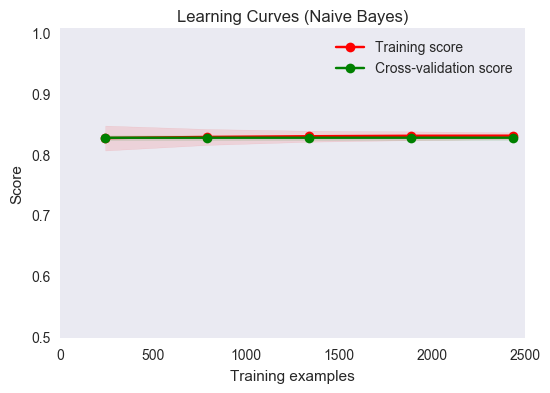

In [107]:
# Pipeline variable can be replaced by your already established estimator
cv = ShuffleSplit(df_Cleaning.shape[0], n_iter=100, test_size=0.6, random_state=0)
plot_learning_curve(pipeline, "Learning Curves (Naive Bayes)", df_Cleaning['Body'], df_Cleaning['From_m'], ylim=(0.5, 1.01), cv=cv, n_jobs=4)

# plot_learning_curve(pipeline, "bla", )

In [108]:
def multi_roc(y, probs):
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
#         probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
#         Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [111]:
from sklearn.metrics import roc_curve

def plot_roc(y, probs, threshmarkers=None):
    fpr, tpr, thresh = roc_curve(y, probs)

    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, lw=2)
   
    plt.xlabel("False Positive Rate\n(1 - Specificity)")
    plt.ylabel("True Positive Rate\n(Sensitivity)")
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xticks(np.linspace(0, 1, 21), rotation=45)
    plt.yticks(np.linspace(0, 1, 21))
    plt.show()

In [112]:
predicted[:, 1]

IndexError: too many indices for array

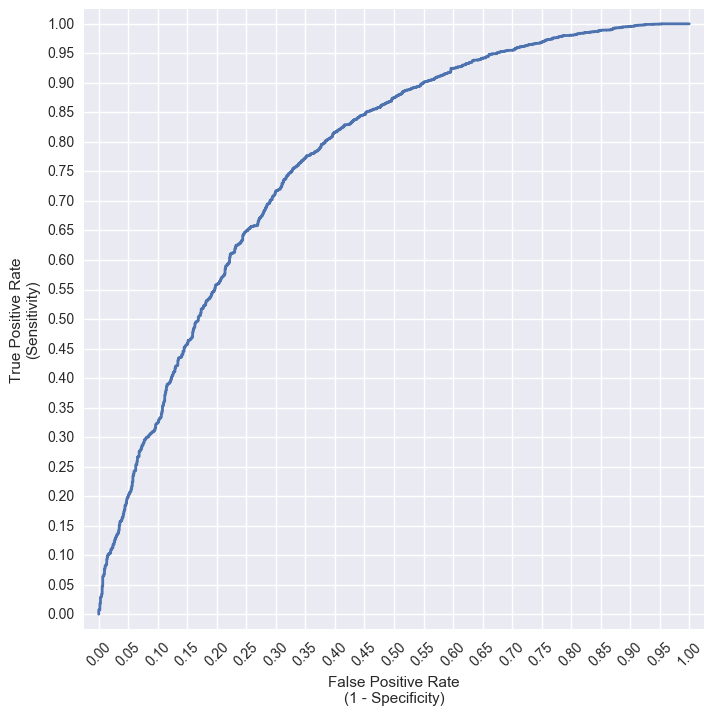

In [113]:
predicted = pipeline.predict_proba(df_Cleaning['Body'])
plot_roc(df_Cleaning['From_m'], predicted[:, 1])